In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
df = pd.read_csv('./Dataset_Evasao.csv')

In [145]:
def describe_by_column(column_name):
  column_values = df[column_name].unique()
  describe_stats = []

  for column_value in column_values:
    column_df = df.loc[df[column_name] == column_value]
    stats = column_df['EVASAO'].describe()
    describe_stats.append([column_value] + stats.tolist())

  df_stats = pd.DataFrame(describe_stats, columns=[column_name, 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
  return df_stats

def print_distribution_by_column(column_name):
  column_values = df[column_name].unique()
  fig, axs = plt.subplots(1, len(column_values), figsize=(20, 10))

  for i, column_value in enumerate(column_values):
    column_df = df.loc[df[column_name] == column_value]
    axs[i].boxplot(column_df['EVASAO'])
    axs[i].set_title(column_value)

## EX 1) Considere o dataset selecionado. Faça a caracterização inicial dos principais tipos dos atributos e avalie as Medidas de Localidade.


#### Unidade de Ensino: Categórico
#### Tipo do Curso: Categórico
#### Evasão: Numérico

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UNIDADE_DE_ENSINO  48 non-null     object
 1   TIPO_DO_CURSO      48 non-null     object
 2   EVASAO             48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [147]:
#dados gerais de evasão
df['EVASAO'].describe()

count    48.000000
mean      6.500000
std      13.739212
min       0.000000
25%       0.000000
50%       1.000000
75%       6.750000
max      70.000000
Name: EVASAO, dtype: float64

In [148]:
#dados de evasão por unidade de ensino

df_ude = describe_by_column('UNIDADE_DE_ENSINO')
df_ude

,UNIDADE_DE_ENSINO,count,mean,std,min,25%,50%,75%,max
0,Campus Araquari,8.0,6.625,8.175530,0.0,0.00,3.5,10.50,22.0
1,Campus Avançado Abelardo Luz,8.0,0.375,0.744024,0.0,0.00,0.0,0.25,2.0
2,Campus Avançado Sombrio,8.0,2.750,5.365232,0.0,0.00,0.0,2.25,15.0
3,Campus Blumenau,8.0,4.625,5.629958,0.0,0.75,2.0,7.25,15.0
4,Campus Brusque,8.0,7.625,20.763550,0.0,0.00,0.0,1.00,59.0
5,Campus Camboriú,8.0,17.000,22.759613,0.0,3.00,12.5,18.25,70.0


In [149]:
#dados de evasão por tipo de curso

df_tc = describe_by_column('TIPO_DO_CURSO')
df_tc

,TIPO_DO_CURSO,count,mean,std,min,25%,50%,75%,max
0,Bacharelado,6.0,7.666667,8.406347,0.0,0.00,7.5,15.00,16.0
1,Especialização,6.0,4.833333,7.808115,0.0,0.00,0.0,8.25,18.0
2,Licenciatura,6.0,4.000000,3.098387,1.0,1.50,3.5,5.50,9.0
3,Mestrado,6.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
4,Mestrado Profissional,6.0,12.166667,28.343724,0.0,0.00,0.5,1.75,70.0
5,Qualificação Profissional,6.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
6,Técnico,6.0,17.333333,22.491480,1.0,1.25,10.5,21.25,59.0
7,Tecnologia,6.0,6.000000,5.513620,0.0,2.00,5.5,8.25,15.0


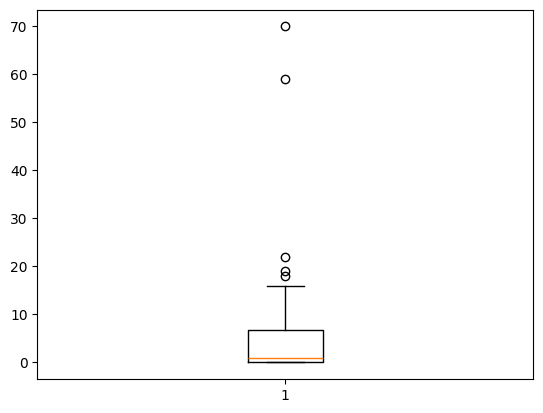

In [150]:
plt.boxplot(df['EVASAO'])
plt.show()

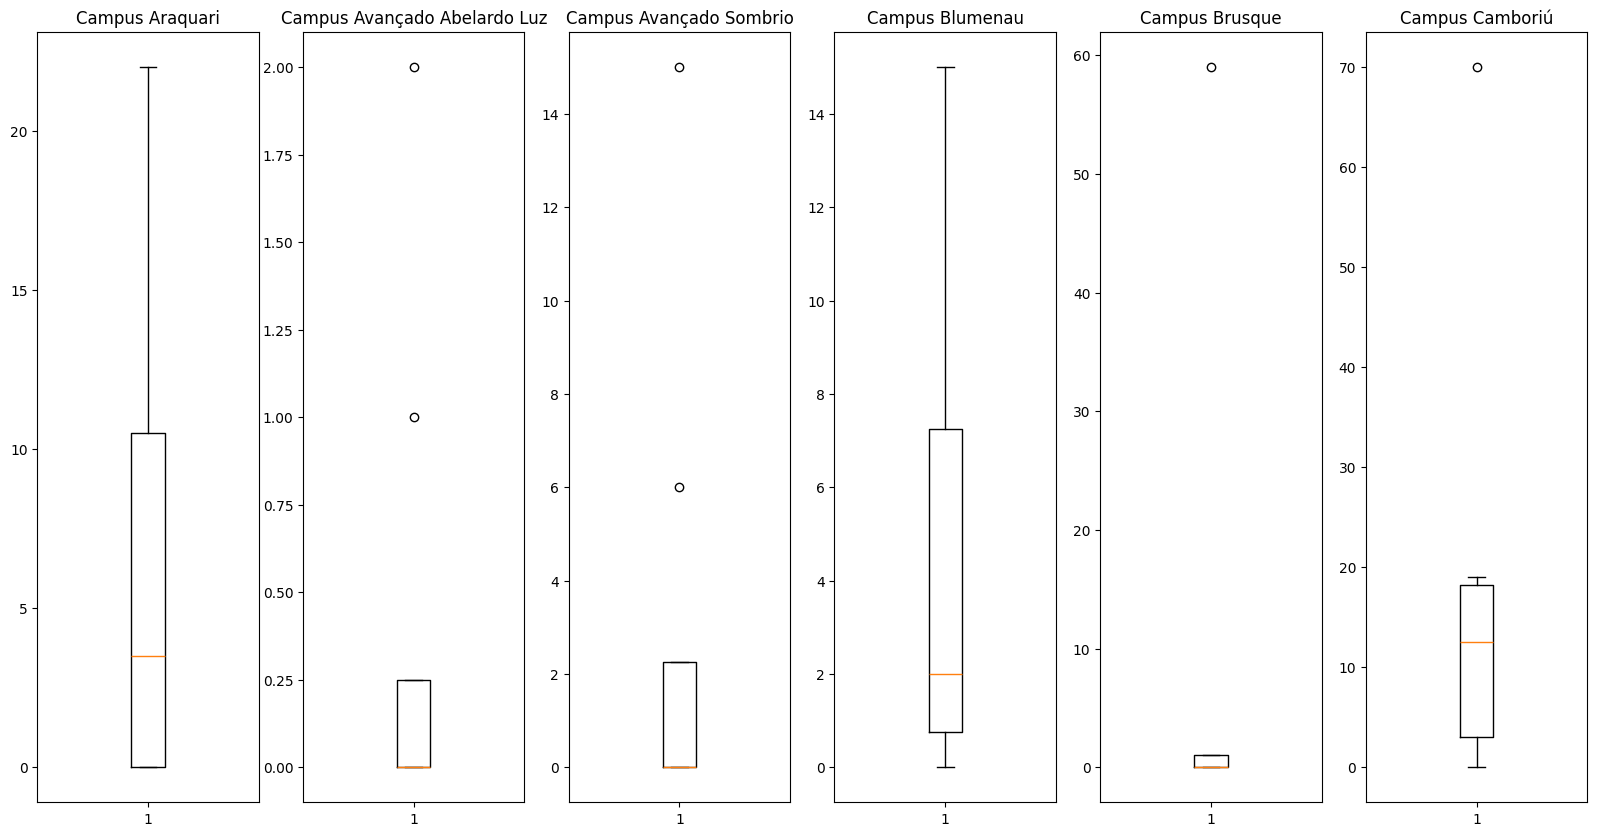

In [151]:
print_distribution_by_column('UNIDADE_DE_ENSINO')

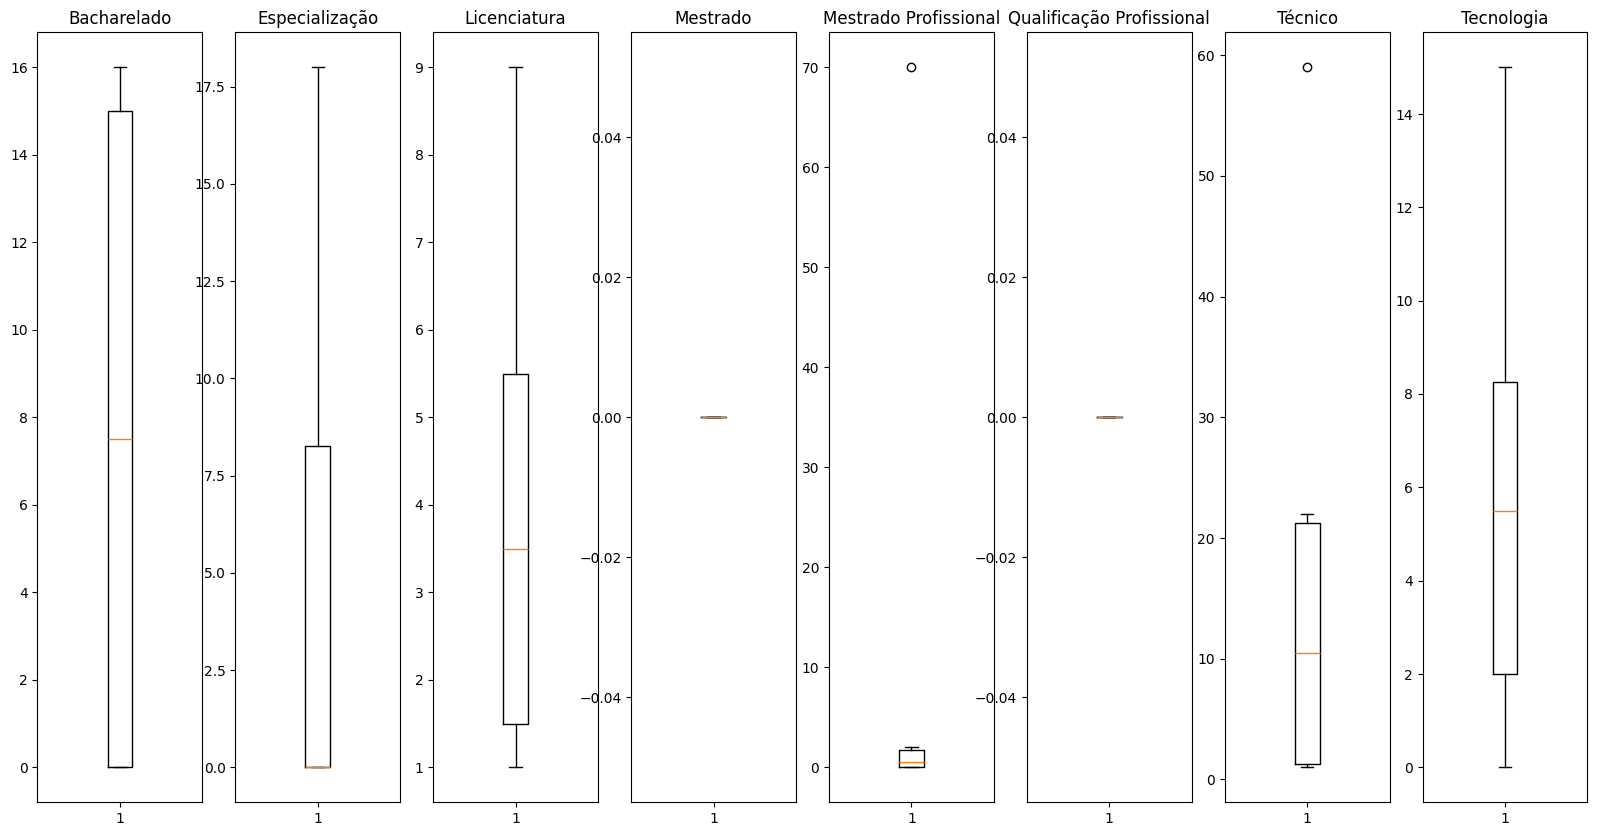

In [152]:
print_distribution_by_column('TIPO_DO_CURSO')

# 3-) Faça a análise de correlação e covariância entre os atributos.

In [153]:
df_dummies = pd.get_dummies(df, columns=["UNIDADE_DE_ENSINO", "TIPO_DO_CURSO"])


In [ ]:
correlation_matrix = df_dummies.corr(numeric_only=True)

covariance_matrix = df_dummies.cov(numeric_only=True)

correlation_with_evasao = correlation_matrix["EVASAO"].sort_values(ascending=False)

print("Correlação com EVASAO:")
print(correlation_with_evasao)
print("\nCovariância com EVASAO:")
print(covariance_matrix["EVASAO"].sort_values(ascending=False))


Correlação com EVASAO:
EVASAO                                            1.000000
UNIDADE_DE_ENSINO_Campus Camboriú                 0.345393
TIPO_DO_CURSO_Técnico                             0.301178
TIPO_DO_CURSO_Mestrado Profissional               0.157539
UNIDADE_DE_ENSINO_Campus Brusque                  0.037006
TIPO_DO_CURSO_Bacharelado                         0.032435
UNIDADE_DE_ENSINO_Campus Araquari                 0.004112
TIPO_DO_CURSO_Tecnologia                         -0.013901
TIPO_DO_CURSO_Especialização                     -0.046335
UNIDADE_DE_ENSINO_Campus Blumenau                -0.061677
TIPO_DO_CURSO_Licenciatura                       -0.069503
UNIDADE_DE_ENSINO_Campus Avançado Sombrio        -0.123355
TIPO_DO_CURSO_Mestrado                           -0.180707
TIPO_DO_CURSO_Qualificação Profissional          -0.180707
UNIDADE_DE_ENSINO_Campus Avançado Abelardo Luz   -0.201480
Name: EVASAO, dtype: float64

Covariância com EVASAO:
EVASAO                                

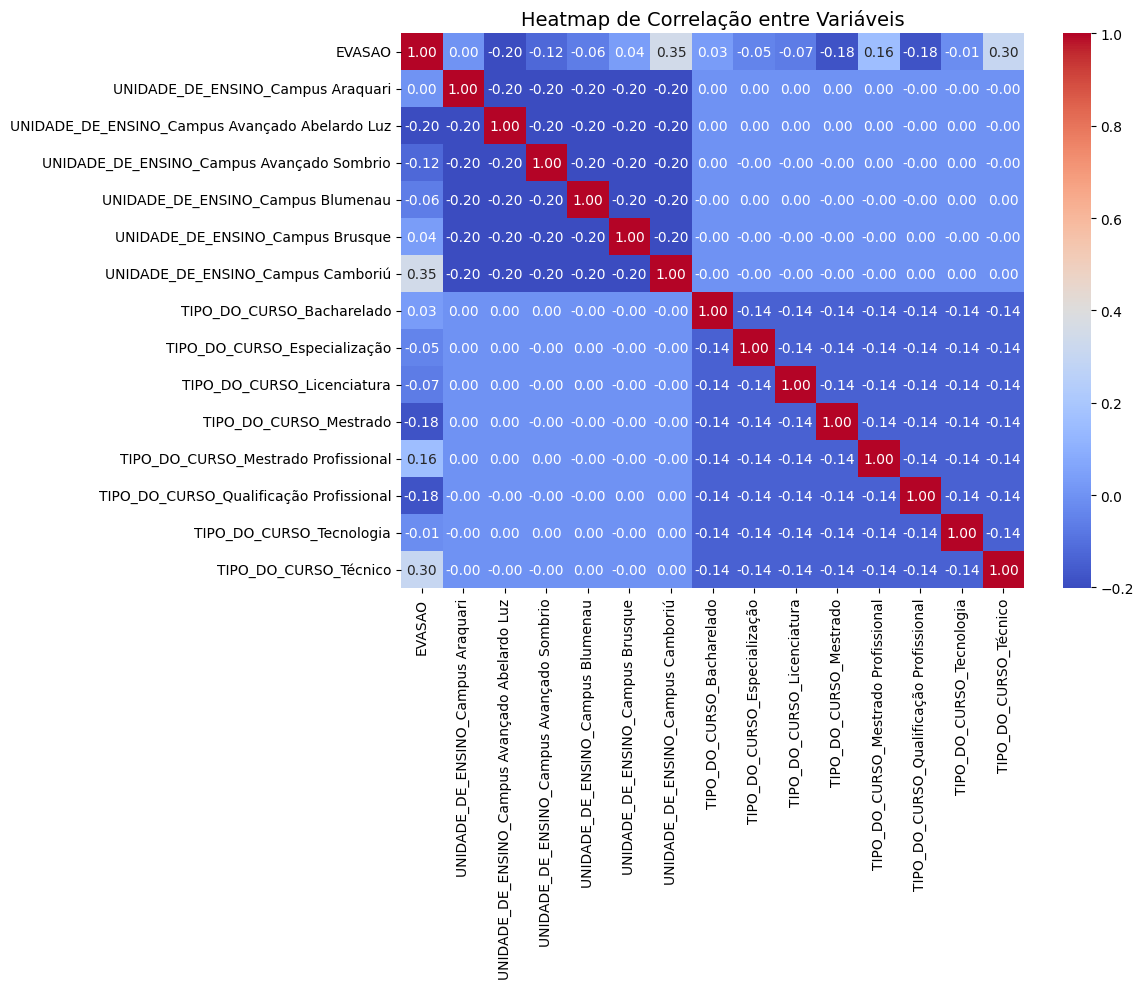

In [158]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap de Correlação entre Variáveis", fontsize=14)
plt.tight_layout()
plt.show()

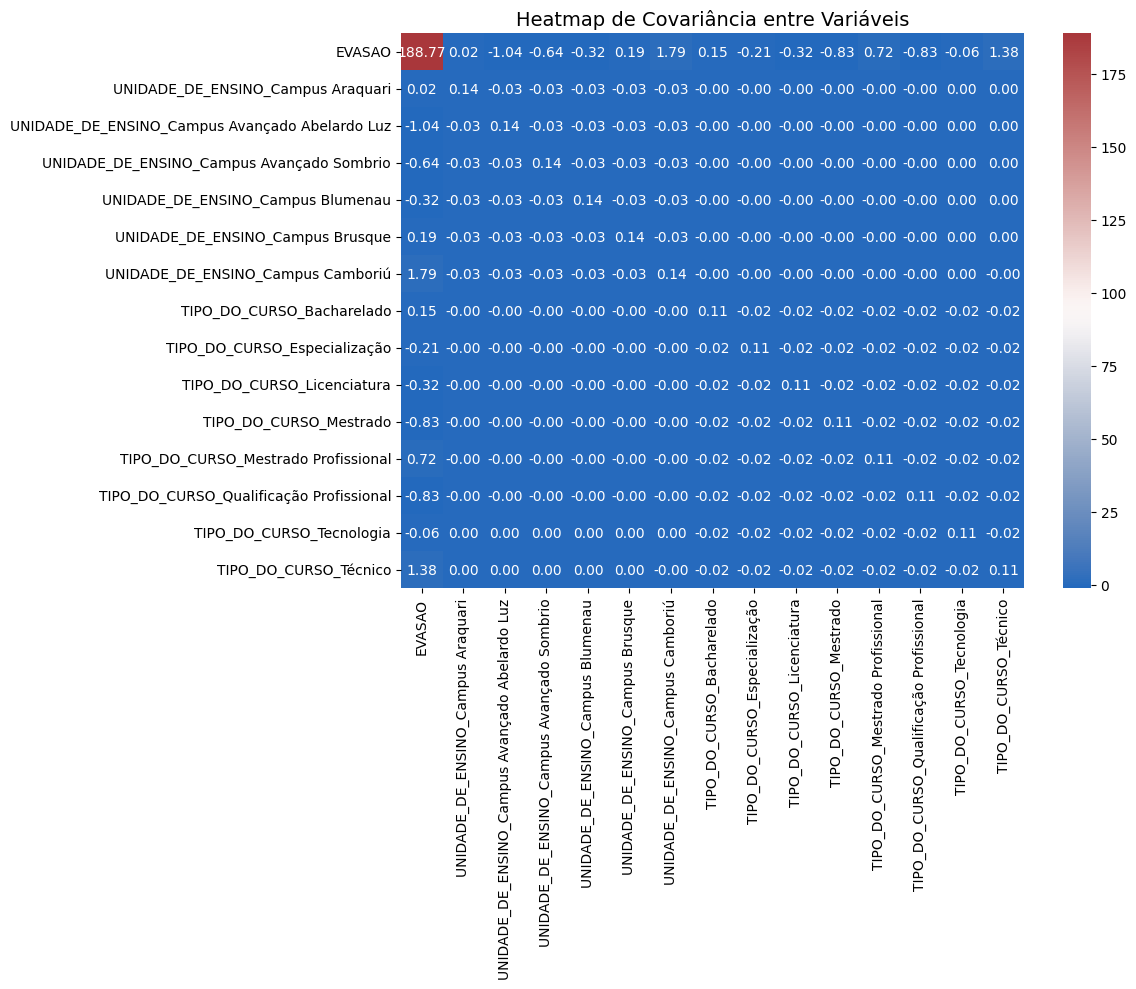

In [159]:
plt.figure(figsize=(12, 10))
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="vlag", cbar=True)
plt.title("Heatmap de Covariância entre Variáveis", fontsize=14)
plt.tight_layout()
plt.show()